# by Dasari Jayanth
2019BCS-016

In [ ]:
import sklearn as sk
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from numpy import arange
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Dataset Creation
Given that  
* For all the cases, assume 20 samples from sin(x) curve over the interval of 0 to 2 pi.   
So, the observed samples (or target samples) = sin(x)+noise. You can assume that the noise follow a Gaussian distribution with mean 0 and variance 1.  
* Generate another 20 new samples from sin(x) curve and find out the mean square error between the predicted values (from the obtained best model) and the true values (obtained from the sin(x) curve).  

==>That means data we are going to use for all different variants of Regression problem is same.  
* Training data contains 20 samples that are result of function **"sin(x) + a"** for some **'x'** over interval 0 to 2 pi, where a is noise, that follows a Guassian distribution with mean 0, & variance 1.  
* For Test data (or validation data) we are going to extract another 20 samples that are results of the above function for some different 'x' (other than the values used for training) to validate our trained model.  
[refer here](https://scriptverse.academy/tutorials/python-matplotlib-plot-sine.html)

# Training Data

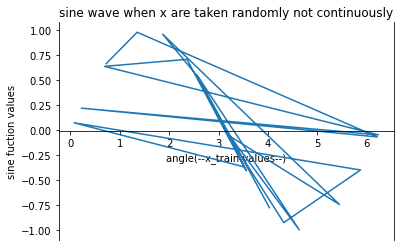

In [2]:
#pi = 3.1415

# get the ndarray object between 0 and 2π.
# We are considering 20 linearly placed x values in the range 0 to 2*pi

#x = np.linspace(0, 2*np.pi, 20)
#x = np.arange(0, math.pi*2, 0.05)
x = np.random.rand(1,40) * (2*np.pi)
x_train = x[0][:20]
x_test  = x[0][20:]
x_train = np.reshape(x_train, (20,1))
x_test  = np.reshape(x_test,  (20,1))

s_train = np.sin(x_train)
s_test  = np.sin(x_test)

s_train = np.reshape(s_train, (20,1))
s_test = np.reshape(s_test, (20,1))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
#ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x_train,s_train)

# plot the x, y label.
plt.xlabel("angle(--x_train values--)")
plt.ylabel("sine fuction values")
# plot the image title.
plt.title('sine wave when x are taken randomly not continuously')

# show the plot
plt.show()

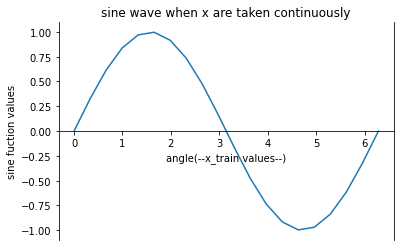

In [3]:
var1 = np.linspace(0, 2*np.pi, 20)
s    = np.sin(var1)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
#ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(var1,s)

# plot the x, y label.
plt.xlabel("angle(--x_train values--)")
plt.ylabel("sine fuction values")
# plot the image title.
plt.title('sine wave when x are taken continuously')

# show the plot
plt.show()

In [4]:
print("Values of x_train are==>")
print(x_train)

print("values of s_train are==>")
print(s_train)

Values of x_train are==>
[[4.02793151]
 [2.55794907]
 [4.6331002 ]
 [3.14937814]
 [3.55994611]
 [2.59071204]
 [1.86666679]
 [5.44565135]
 [3.19263314]
 [4.31877195]
 [5.8728201 ]
 [0.07220431]
 [3.51903946]
 [2.35863376]
 [0.68814869]
 [6.23498213]
 [0.22006715]
 [6.21399023]
 [1.34965032]
 [0.72394201]]
values of s_train are==>
[[-0.77476217]
 [ 0.55106802]
 [-0.99685829]
 [-0.00778541]
 [-0.40625646]
 [ 0.52343777]
 [ 0.9565487 ]
 [-0.74299487]
 [-0.05101833]
 [-0.92352786]
 [-0.39894424]
 [ 0.07214158]
 [-0.3685482 ]
 [ 0.70537986]
 [ 0.63510828]
 [-0.04818451]
 [ 0.21829515]
 [-0.06913988]
 [ 0.97564672]
 [ 0.66234317]]


To generate 20 values of a (noise in the function), assuming that noise follows a Gaussian distribution(normal distribution) with mean 0 and variance 1.  
**syntax** ==> np.random.normal(loc=0.0, scale=1.0, size=(20,1) (here)  
parameters meaning,  
loc   ==> represents Mean("Centre") of the distribution. type=> float or array_like of floats.  
scale ==> represents Standard deviation of the distribution. type=> float or array_like of floats.  
size  ==> represents the shape of output array.(optional)   
[refer here](https://machinelearningknowledge.ai/numpy-random-rand-randn-randint-normal-uniform-binomial-poisson-sample-choice/#2_nprandomnormal)  
for numpy.random [refer here](https://pythonguides.com/python-numpy-random/) 

In [5]:
a = np.random.normal(0,1,(40,1))

In [6]:
a_train = a[:20]
a_test  = a[20:]
print(f"values of a_train are: ")
a_train

values of a_train are: 


array([[ 1.24771153],
       [ 0.15627884],
       [ 1.38406774],
       [-1.52896158],
       [-0.60895242],
       [ 0.3282701 ],
       [-1.16012052],
       [-0.09230449],
       [ 0.12568317],
       [-0.10592505],
       [ 0.38046056],
       [ 0.43811635],
       [-0.50829683],
       [-0.35093319],
       [-0.61804793],
       [-2.13687809],
       [-1.24186901],
       [-0.1411044 ],
       [-1.57487189],
       [-1.14289471]])

In [7]:
y_train = np.add(s_train, a_train)
print(y_train)

[[ 0.47294935]
 [ 0.70734686]
 [ 0.38720945]
 [-1.53674699]
 [-1.01520888]
 [ 0.85170788]
 [-0.20357182]
 [-0.83529936]
 [ 0.07466484]
 [-1.02945292]
 [-0.01848368]
 [ 0.51025793]
 [-0.87684503]
 [ 0.35444667]
 [ 0.01706035]
 [-2.1850626 ]
 [-1.02357386]
 [-0.21024428]
 [-0.59922517]
 [-0.48055155]]


# Test Data

In [8]:
x_test

array([[1.90975809],
       [0.68413997],
       [0.36337387],
       [1.53768029],
       [2.75431719],
       [3.62938116],
       [3.43110975],
       [1.30513396],
       [2.79513597],
       [2.01723283],
       [3.60853416],
       [6.10241212],
       [3.1558215 ],
       [4.64279764],
       [4.71318246],
       [0.09989467],
       [3.82144167],
       [4.67720338],
       [4.885731  ],
       [1.15439627]])

In [9]:
a_test

array([[-0.59150445],
       [-0.62334197],
       [-1.74100224],
       [-1.23393992],
       [-1.05142109],
       [ 1.76453665],
       [ 0.40166993],
       [-0.06564404],
       [ 0.30923028],
       [ 0.17140445],
       [ 0.88579689],
       [ 0.86175979],
       [ 2.55387005],
       [-0.19050725],
       [ 0.56909522],
       [ 1.33546213],
       [ 0.06290933],
       [ 1.40390314],
       [ 0.98277137],
       [ 0.2148284 ]])

In [10]:
print("values of s_test are==>")
s_test

values of s_test are==>


array([[ 0.9431004 ],
       [ 0.63200675],
       [ 0.35542982],
       [ 0.99945171],
       [ 0.37766705],
       [-0.46867347],
       [-0.28548946],
       [ 0.96491881],
       [ 0.33956717],
       [ 0.90199138],
       [-0.45015732],
       [-0.17979021],
       [-0.01422837],
       [-0.9975795 ],
       [-0.99999969],
       [ 0.09972861],
       [-0.62867562],
       [-0.99938105],
       [-0.98501385],
       [ 0.91455094]])

In [11]:
y_test = np.add(s_test, a_test)
print(y_test)

[[ 3.51595946e-01]
 [ 8.66478856e-03]
 [-1.38557243e+00]
 [-2.34488202e-01]
 [-6.73754040e-01]
 [ 1.29586318e+00]
 [ 1.16180471e-01]
 [ 8.99274771e-01]
 [ 6.48797449e-01]
 [ 1.07339583e+00]
 [ 4.35639574e-01]
 [ 6.81969571e-01]
 [ 2.53964167e+00]
 [-1.18808675e+00]
 [-4.30904460e-01]
 [ 1.43519074e+00]
 [-5.65766294e-01]
 [ 4.04522085e-01]
 [-2.24248419e-03]
 [ 1.12937933e+00]]


# Simple Linear Regression

==> In the linear regression objective function we try to minimize the sum of squares of errors.

In [12]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [13]:
# predicting
LR_y_t_pred = LR.predict(x_test)

# Evaluating
LR_mse = mean_squared_error(y_test, LR_y_t_pred)
r1 = metrics.r2_score(y_test, LR_y_t_pred)
LR_mse,r1


(1.2454098913600182, -0.4643473047924158)

# Multiple Linear Regression  
Using Real-time dataset ==> "Kaggle Dataset [CO2 Emission](https://www.kaggle.com/debajyotipodder/co2-emission-by-vehicles). "  
[cars dataset](https://www.w3schools.com/python/cars.csv)

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scale = StandardScaler()

df = pd.read_csv("cars.csv")
df.columns


Index(['Car', 'Model', 'Volume', 'Weight', 'CO2'], dtype='object')

In [15]:
mX = df[['Weight', 'Volume']]
my = df['CO2']

In [16]:
# s_mx = scale.fit_transform(mx)
# mx_train, my_train, mx_test, my_test = train_test_split(s_mx, my)  

# Model Building
MR_model = LinearRegression()
MR_model.fit(mX, my)

# Predicting
m_t_y_pred = MR_model.predict(mX)

# Evaluating
MLR_mse = mean_squared_error(my, m_t_y_pred)
r1 = metrics.r2_score(my, m_t_y_pred)
MLR_mse,r1

(33.68279098995156, 0.37655640436199855)

# Polynomial Regression of Degree M

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Transform input data
M = 3 # set what ever value you want to be the degree of that polynomial

# transformer = PolynomialFeatures(degree=M, include_bias=False)
# transformer.fit(x_train)
# # Create new, modified input
# x_ = transformer.transform(x)

x_train_ = PolynomialFeatures(degree=M, include_bias=False).fit_transform(x_train)
print(x_train_)

x_test_ = PolynomialFeatures(degree=M, include_bias=False).fit_transform(x_test)

[[4.02793151e+00 1.62242322e+01 6.53500961e+01]
 [2.55794907e+00 6.54310342e+00 1.67369253e+01]
 [4.63310020e+00 2.14656174e+01 9.94523563e+01]
 [3.14937814e+00 9.91858268e+00 3.12373675e+01]
 [3.55994611e+00 1.26732163e+01 4.51159672e+01]
 [2.59071204e+00 6.71178885e+00 1.73883122e+01]
 [1.86666679e+00 3.48444491e+00 6.50429759e+00]
 [5.44565135e+00 2.96551186e+01 1.61491436e+02]
 [3.19263314e+00 1.01929064e+01 3.25422107e+01]
 [4.31877195e+00 1.86517912e+01 8.05528326e+01]
 [5.87282010e+00 3.44900159e+01 2.02553659e+02]
 [7.22043055e-02 5.21346174e-03 3.76434384e-04]
 [3.51903946e+00 1.23836387e+01 4.35785134e+01]
 [2.35863376e+00 5.56315320e+00 1.31214409e+01]
 [6.88148694e-01 4.73548625e-01 3.25871868e-01]
 [6.23498213e+00 3.88750022e+01 2.42384944e+02]
 [2.20067147e-01 4.84295493e-02 1.06577528e-02]
 [6.21399023e+00 3.86136745e+01 2.39944996e+02]
 [1.34965032e+00 1.82155598e+00 2.45846361e+00]
 [7.23942010e-01 5.24092034e-01 3.79412240e-01]]


In [18]:
# Model Building

# No need to include the fit_intercept as it will be already in left most columns
PLR = LinearRegression(fit_intercept=False).fit(x_train_, y_train)

# Predicting
P_y_t_pred = PLR.predict(x_test_)

# Evaluating
P_mse = mean_squared_error(y_test, P_y_t_pred)
r1 = metrics.r2_score(y_test, P_y_t_pred)
P_mse,r1

(1.188457562172581, -0.3973830142999084)

In [19]:
np.sqrt(P_mse)

1.0901640070065517

# Ridge Regression

==>  Used to fit a Regression model when **MultiCollinearity** is present in the data.  
==>  Here we add a constraint on the sum of squares of regression coefficients.  Ridge regression makes use of **L2 Regularization**.  

In [20]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold

choosing lambda parameter,  
lambda =   0   ==> No change to least square coefficients.  
lambda = high  ==> Underfitting  
so minimum value of lambda is chosen after which parameters tend to stabilize.(Here we use repeated k-fold function to find optimal lambda value.  
RidgeCV() only tests alpha values .1, 1, and 10 by default. However, we can define our own alpha range from 0 to 1 by increments of 0.01  


In [21]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
#define model
model = RidgeCV(alphas=arange(0, 1, 0.09), cv=cv, scoring='neg_mean_squared_error') # normalize = True
#fit model
model.fit(x_train, y_train)
#display lambda that produced the lowest test MSE
alpha = model.alpha_

In [22]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha)
ridge.fit(x_train,y_train)

Ridge(alpha=0.99)

In [23]:
R_y_t_pred = model.predict(x_test)
R_mse = mean_squared_error(y_test, R_y_t_pred)
r1 = metrics.r2_score(y_test, R_y_t_pred)
r1,R_mse

(-0.4644738888994664, 1.2455175496310402)

In [24]:
np.sqrt(R_mse)

1.1160275756588813

# LASSO Regression

LASSO ==> Least Absolute Shrinkage and Selection Operator.  
An alternative to the least squares estimate to avoid many of the problems with overfitting when we have a large number of independent variables.  
Lasso Regression will help in feature selection by making redundant variables coefficients to zero.

In [25]:
from sklearn .linear_model import Lasso, LassoCV

In [26]:
# Choosing optimal value of alpha using GridSearchcv

# grid search cv
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
folds = KFold(n_splits = 10, shuffle = True, random_state = 42)
# range of hyperparameters
params = {'alpha':[0.001, 0.01, 0.1, 0.9, 1.0, 5.0, 10.0]}
# LASSO model
model = Lasso()
# greadsearchcv
model_cv = GridSearchCV(estimator = model, param_grid = params,scoring = 'r2', cv = folds, return_train_score = True, verbose = 1)
model_cv.fit(x_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.9, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [27]:
alpha = model_cv.best_params_['alpha']
alpha

0.9

can use either GridSearchCV method --or-- LassoCV method here we are using GridSearchCV


In [28]:
# #define cross-validation method to evaluate model
# cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
# #define model
# model = LassoCV(alphas=arange(0.1, 1.0, 0.01), cv=cv, n_jobs= -1) # normalize = True
# #fit model
# model.fit(x_train, y_train)
# #display lambda that produced the lowest test MSE
# alpha = model.alpha_
# alpha

In [29]:
from sklearn.utils.sparsefuncs import mean_variance_axis
# model building
lasso = Lasso(alpha)
lasso.fit(x_train, y_train)

# predictions
L_y_t_pred  = lasso.predict(x_test)

# Evaluating
r1 = metrics.r2_score(y_test, L_y_t_pred)

# Mean Squared Error
MSE = mean_squared_error(y_test, L_y_t_pred)

r1, MSE

(-0.5104647517676719, 1.2846322291478405)

In [30]:
np.sqrt(MSE)

1.1334161764982185

# Elastic-Net Regression

Combines L1 and L2 Parameters and performs a more efficient regularization process

In [31]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [32]:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)
#define model
model = ElasticNetCV(l1_ratio = arange(0.2, 1.0, 0.02), alphas = [1e-5, 1e-4, 1e-3 , 0.1, 0.01, 1.0, 10.0, 100.0] , cv=cv) # normalize = True
#fit model
model.fit(x_train, y_train)
#display lambda that produced the lowest test MSE
alpha    = model.alpha_
l1_ratio = model.l1_ratio_
alpha, l1_ratio

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(100.0, 0.2)

In [33]:
alpha, l1_ratio

(100.0, 0.2)

In [34]:
# model building
Enet = ElasticNet(alpha = alpha, l1_ratio= l1_ratio) 
Enet.fit(x_train, y_train)

# predictions
Enet_y_t_pred = Enet.predict(x_test)

# Evaluating
r1 = metrics.r2_score(y_test, Enet_y_t_pred)

# Mean Squared Error
MSE = mean_squared_error(y_test, Enet_y_t_pred)

r1, MSE

(-0.5104647517676719, 1.2846322291478405)

# Bridge Regression

In [35]:
from sklearn.linear_model import BayesianRidge


In [36]:
# model building
model = BayesianRidge()
model.fit(x_train, y_train)
   
# Predictions
B_y_t_pred = model.predict(x_test)

# Evaluating
r1 = metrics.r2_score(y_test, B_y_t_pred)

# Mean Squared Error
MSE = mean_squared_error(y_test, B_y_t_pred)
r1, MSE

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(-0.4896476536616443, 1.2669275358651675)

In [37]:
np.sqrt(MSE)

1.1255787559585368